# About the Data
- This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.


# What you can do with this Data ?
- You can use this data to analyze Amazon’s Alexa product ;
- discover insights into consumer reviews and assist with machine learning models.
- You can also train your machine models for sentiment analysis and analyze customer reviews how many positive reviews ? 
- and how many negative reviews ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df=pd.read_csv('../Naive Bayes/amazon_alexa.tsv',sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [4]:
test = df.copy(deep=True)
test.loc[test['feedback'] == 1, 'feedback'] = 'Positive'

In [10]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [28]:
review=[]
for i in range(len(df['feedback'])):
        if df['feedback'][i]==1:
            review.append('POSITIVE')
        else:
            review.append('NEGATIVE')

In [29]:
df['Review']=review

In [30]:
df.head()

,rating,date,variation,verified_reviews,feedback,Review
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,POSITIVE
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,POSITIVE
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,POSITIVE
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,POSITIVE
4,5,31-Jul-18,Charcoal Fabric,Music,1,POSITIVE


C:\Users\ROHAN\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


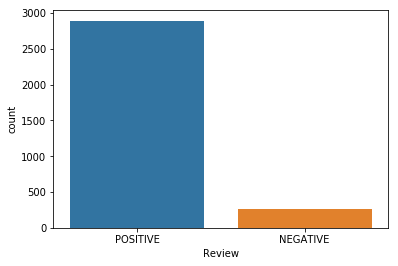

In [35]:
sns.countplot(df.Review)

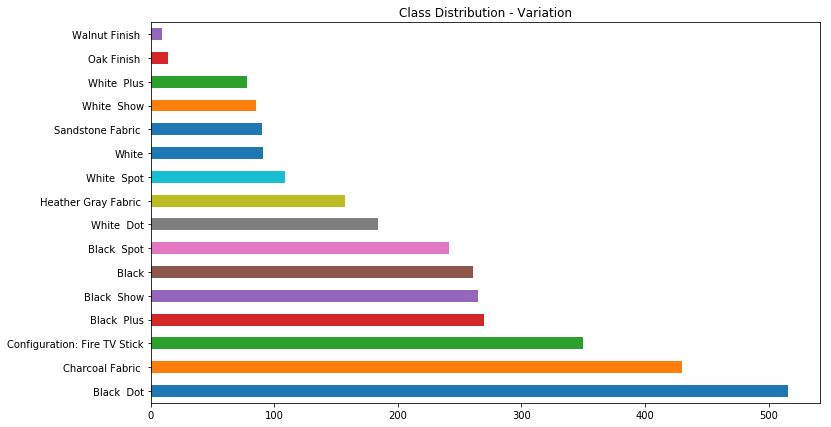

In [37]:
df.variation.value_counts().plot.barh(figsize=(12, 7))
plt.title("Class Distribution - Variation");

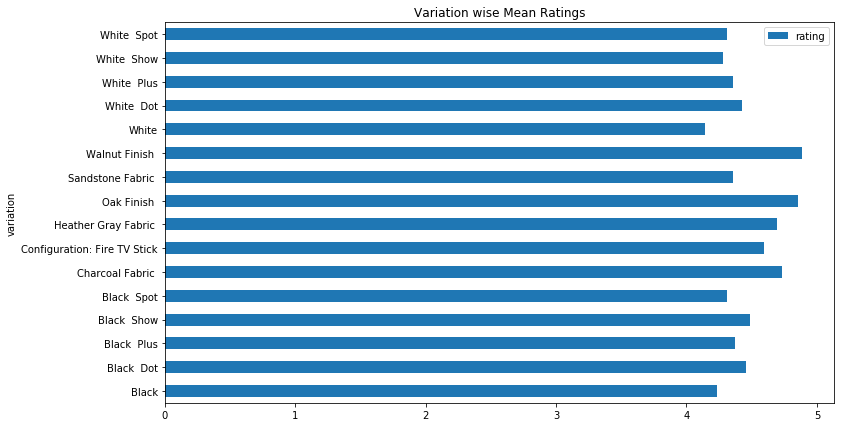

In [39]:
df.groupby('variation').mean()[['rating']].plot.barh(figsize=(12, 7))
plt.title("Variation wise Mean Ratings");

In [41]:
df['review_length'] = df.verified_reviews.str.len()

In [43]:
pd.DataFrame(df.review_length.describe()).T

,count,mean,std,min,25%,50%,75%,max
review_length,3150.0,132.049524,182.099952,1.0,30.0,74.0,165.0,2851.0


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [46]:
cv.fit_transform(df.verified_reviews)

<3150x3784 sparse matrix of type '<class 'numpy.int64'>'
	with 33005 stored elements in Compressed Sparse Row format>

In [48]:
vector = cv.fit_transform(df.verified_reviews)

In [49]:
sum_words = vector.sum(axis=0)

In [50]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [51]:
freq_df = pd.DataFrame(words_freq, columns=['word', 'freq'])

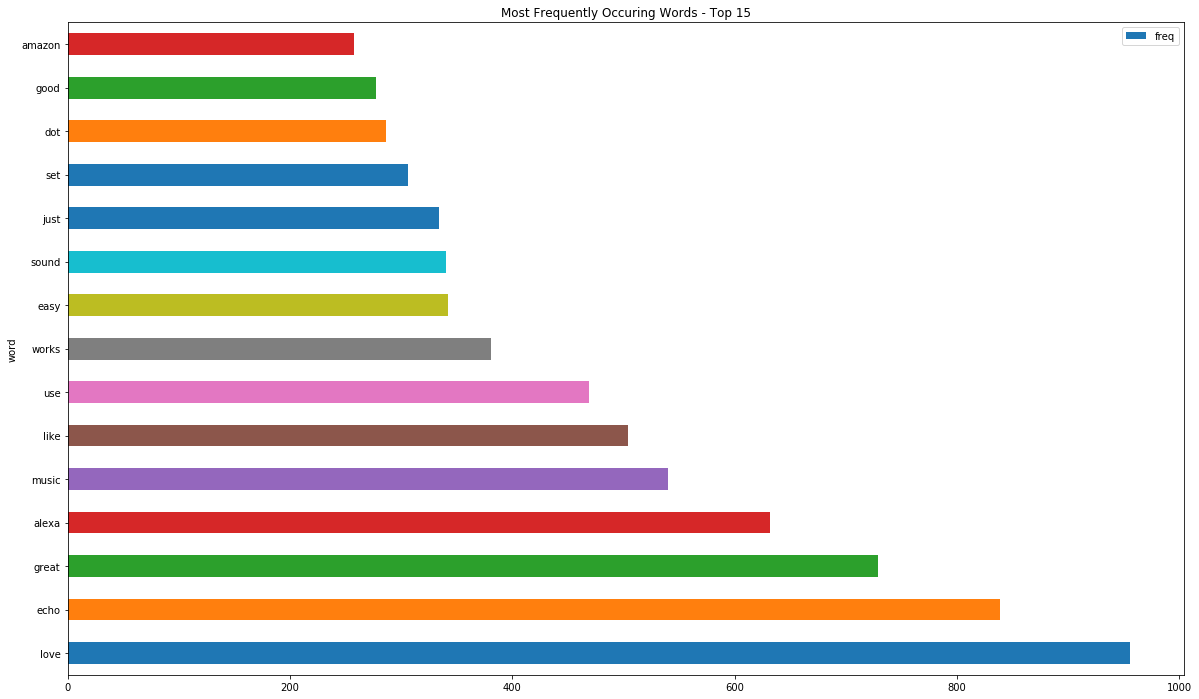

In [52]:
freq_df.head(15).plot(x='word', y='freq', kind='barh', figsize=(20, 12))
plt.title("Most Frequently Occuring Words - Top 15");

In [53]:
features = pd.DataFrame(vector.toarray(), columns=list(sorted(cv.vocabulary_)))

In [55]:
features = features.join(df[['review_length', 'variation']], rsuffix='_base')
features = pd.get_dummies(features)

In [57]:
target = df[['feedback']].astype(int)

In [58]:

from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [65]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(x_train, y_train) 

C:\Users\ROHAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [69]:
y_pred = model.predict(x_test) 
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0,

In [70]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 61.746031746


In [72]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

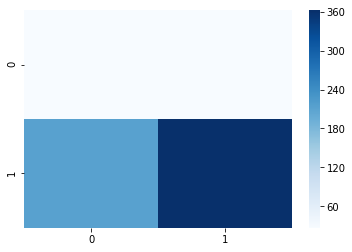

In [73]:
sns.heatmap(data=confusion_matrix(y_test,y_pred),cmap='Blues')

In [76]:
model.predict_proba(x_test)[:10]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])